#Introduction to neural networks classification with Tenorflow

In this notebook we're going to build a neural network for classification

A classification is where you try to classify something as one thing or another.

A few type of classification problems are:
* Binary Classification
* Multiclass Classification
* Multilabel Classification


## Creating data to fit and view

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

#Create Circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now....Let's visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" :X[:, 1], "label": y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


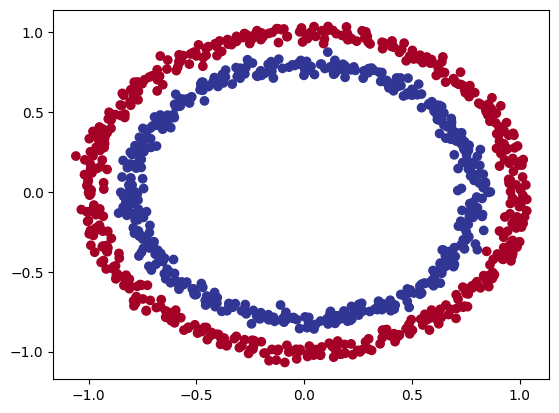

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

⚒️ Exercise: https://playground.tensorflow.org/

##Input and Output shapes

In [ ]:
  X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#How many samples?
len(X), len(y)

(1000, 1000)

##Steps in modelling

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model using Sequential API
model_1 = tf.keras.models.Sequential() # Create a Sequential model object
model_1.add(tf.keras.layers.Dense(1)) # Add a Dense layer to the model

#2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_1.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5537 - loss: 5.8088


[5.793030738830566, 0.5550000071525574]

Since we are working on a binary classification problem and our model is getting around 50% accuracy. let's try adding a layer

In [ ]:
 #set random seed
tf.random.set_seed(42)

 #1. Create a model
model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
 ])

#2. Complie the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_2.fit(X, y, epochs = 200, verbose = 0)


In [ ]:
#4. Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5045 - loss: 7.8989


[7.971191883087158, 0.5]

##Improving the model

Let's look into our bag of tricks to improve our model

1. Create a model - add more layers or number of hidden units.
2. Compile a model - we might choose different optimization function (eg.ADAM)
3. Fitting a model - more epochs


In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # Output layer for binary classification should have 1 unit
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#3. Fit the model
model_3.fit(X, y, epochs= 100, verbose = 0)

In [ ]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5045 - loss: 0.6917


[0.6942081451416016, 0.4869999885559082]

To visualize our model's prediction, let's create a function `plot_decision_boundry()`, This function will:

* Take in a trained model, features(x) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Define the boundaries created by a model predicting X
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (We are going to make predictions on these)
    X_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(X_in)

    # Check for multiclass
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


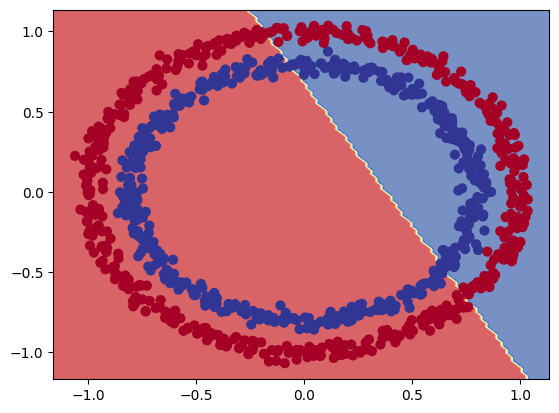

In [ ]:
plot_decision_boundary(model = model_3, X=X, y=y);

In [ ]:
# Let's see if our model can solve regression problem

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression

# training and testing data set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
X_reg_train = tf.reshape(X_reg_train, [X_reg_train.shape[0], 1])

model_3.fit(X_reg_train, y_reg_train, epochs = 100, verbose = 0)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
  • training=True
  • mask=None

In [ ]:
#Set the model such that it fits the regression problem
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

#Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs = 100, verbose = 0)

#make predictions
y_reg_pred = model_3.predict(X_reg_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [ ]:
X_reg_train.shape, X_reg_test.shape

(TensorShape([150, 1]), TensorShape([50]))

In [ ]:
#make predictions
y_reg_pred = model_3.predict(X_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


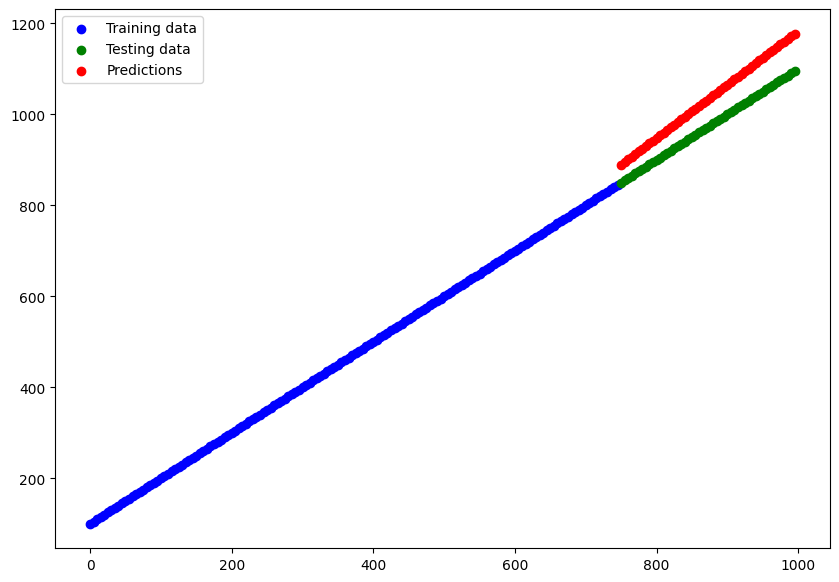

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c= "g", label = "Testing data")
plt.scatter(X_reg_test, y_reg_pred, c = "r", label = "Predictions")
plt.legend();
#

#Non Linearity

In [ ]:
#Set the Random Seet
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

#2. Compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


#3. Fit the model
history = model_4.fit(X, y, epochs = 100, verbose = 0)

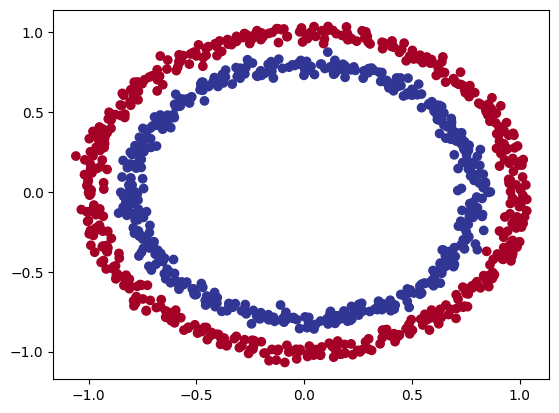

In [ ]:
#Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing binary classification


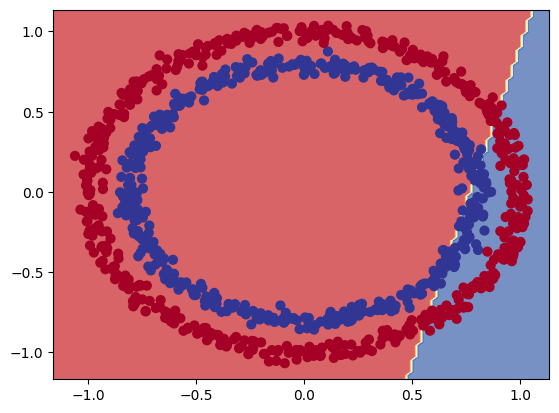

In [ ]:
#Check the decision boundry
plot_decision_boundary(model = model_4,
                       X = X,
                       y = y)

Model With non-linear activation function

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    ])

#Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
model_5.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [ ]:
#TRYING OUT THE TANH VARIANT

#Set the random seed
tf.random.set_seed(42)

#1. Create the Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#2. Compile the model
model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["Accuracy"])

In [ ]:
model_6.fit(X, y, epochs = 300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - Accuracy: 0.4895 - loss: 0.7492
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.4881 - loss: 0.7396  
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.4863 - loss: 0.7316 
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.4879 - loss: 0.7249 
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.4902 - loss: 0.7192 
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.4850 - loss: 0.7146 
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.4832 - loss: 0.7108 
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.4915 - loss: 0.7076 
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.4885 - loss: 0.7050 
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.4888 - loss: 0.7029 
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.4917 - loss: 0.7011 
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

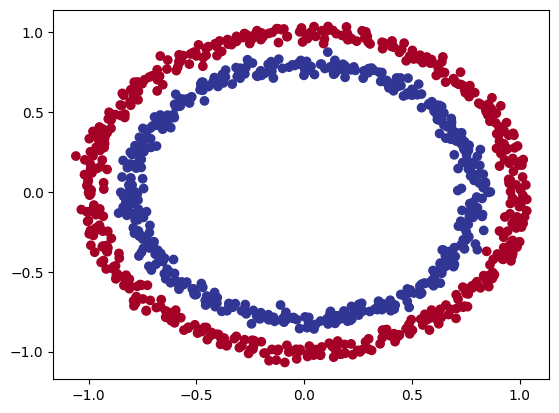

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing binary classification


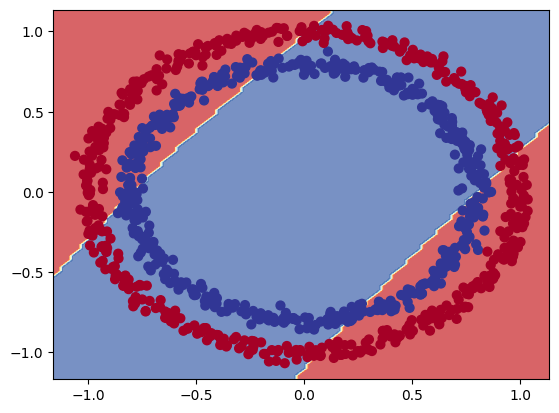

In [ ]:
plot_decision_boundary(model = model_6,
                       X = X,
                       y = y)

In [ ]:
# another try
tf.random.set_seed(42)

#Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation= tf.keras.activations.sigmoid)
])

#Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

#Fit the model
model_7.fit(X, y, epochs = 200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5174 - loss: 0.7328
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4913 - loss: 0.7202 
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4600 - loss: 0.7136 
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4311 - loss: 0.7099
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4267 - loss: 0.7075 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4263 - loss: 0.7055
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4128 - loss: 0.7040 
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3847 - loss: 0.7025
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3849 - loss: 0.7012 
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3847 - loss: 0.7001 
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3849 - loss: 0.6990 
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


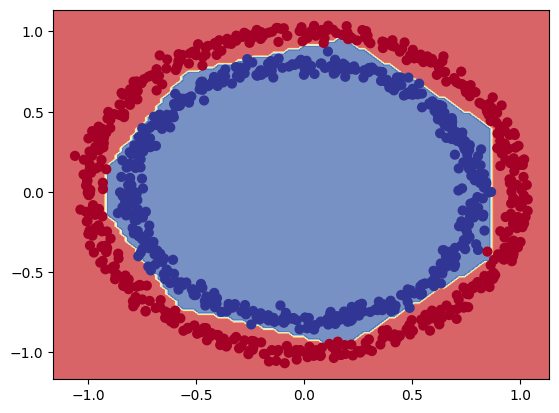

In [ ]:
plot_decision_boundary(model = model_7,
                       X = X,
                       y = y)

**NOTE**: The combinatios of linear and non-linear functions is key fundamental of NN

In [ ]:
#Create a T ensor
A = tf.cast(tf.range(-10,10), dtype = tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

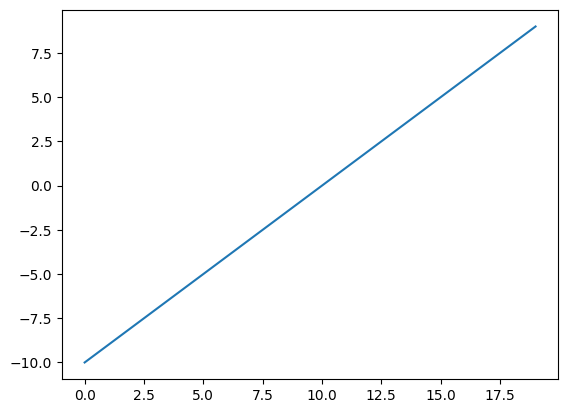

In [ ]:
plt.plot(A)

In [ ]:
# Replicate sigmoid
def sigmoid(x):
    return 1/(1+tf.exp(-x))



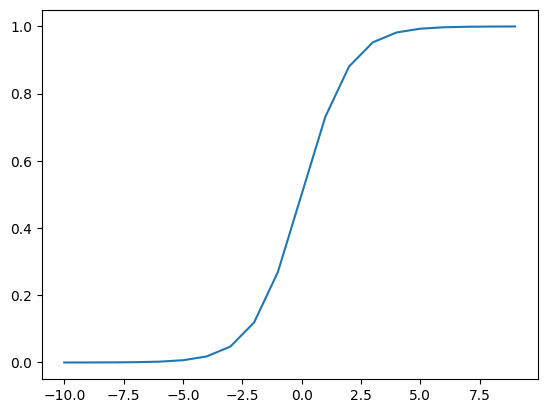

In [ ]:
plt.plot(A, sigmoid(A))

In [ ]:
# RELU function
def relu(x):
  return tf.maximum(0, x)

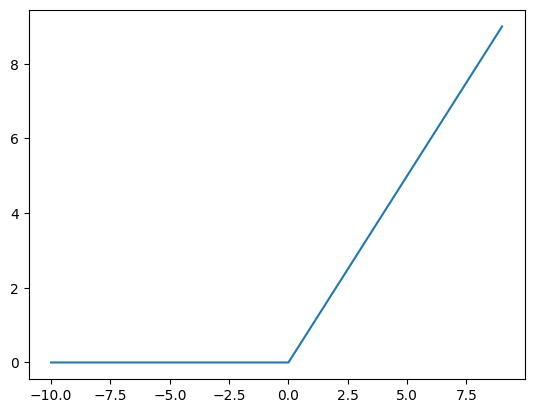

In [ ]:
plt.plot(A, relu(A))

##Evaluating and improving our classification

In [ ]:
len(X)

1000

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_train.shape, y_test.shape

((800,), (200,))

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
#Let's recreate a model to fit on training data and fit on testing data.

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#2. Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

In [ ]:
history_8=model_8.fit(X_train, y_train, epochs = 25, verbose = 0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


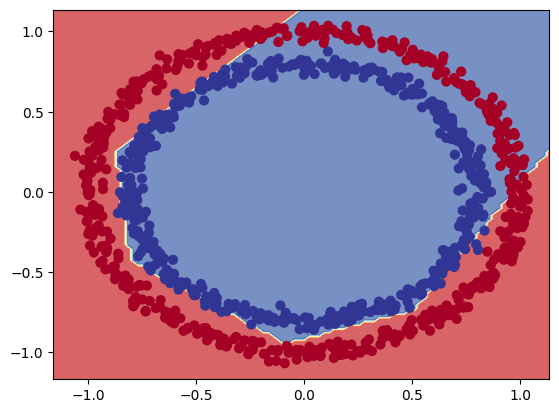

In [ ]:
plot_decision_boundary(model = model_8,
                       X = X,
                       y = y)

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7912 - loss: 0.4695


[0.45855313539505005, 0.7950000166893005]

Text(0, 0.5, 'Loss')

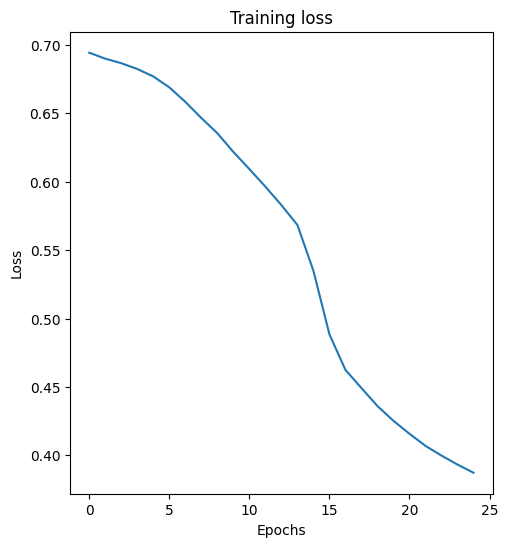

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_8.history["loss"])
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


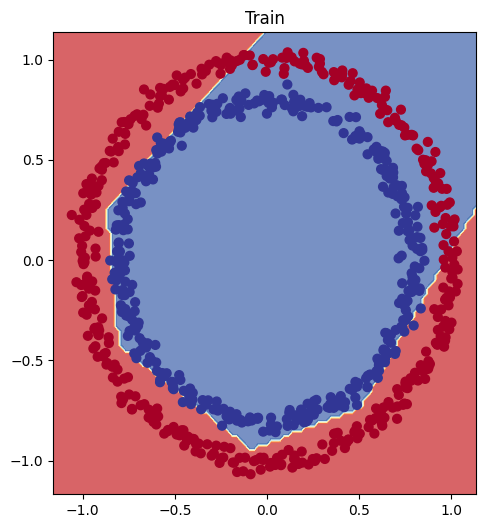

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


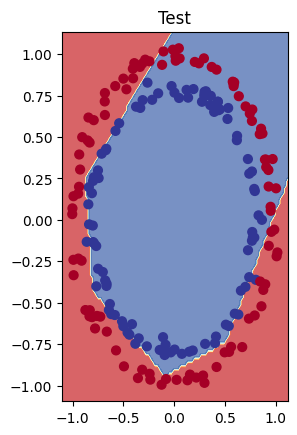

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model_8.predict(X_test)
y_pred = tf.round(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
print(accuracy_score(y_test, y_pred))

0.795


In [ ]:
model_8.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (32, 4)                     │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (32, 4)                     │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (32, 1)                     │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

##Plot the loss cruves

In [ ]:
pd.DataFrame(history_8.history)

,accuracy,loss
0,0.46500,0.694272
1,0.51000,0.689928
2,0.52375,0.686616
3,0.53750,0.682376
4,0.54875,0.676945
5,0.56750,0.668937
6,0.60000,0.658390
7,0.62000,0.646562
8,0.63875,0.635444
9,0.65125,0.621766


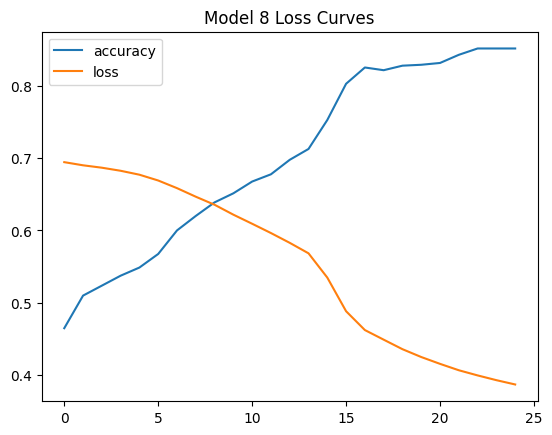

In [ ]:
#plot the lost curves
pd.DataFrame(history_8.history).plot()
plt.title("Model 8 Loss Curves")
plt.show()

🔑**NOTE:** For many prblms, the loss function going down means the model is improving (the prediction it's making are getting closer to the ground truth labels)

##Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during the training) we are going to use the following steps:
* A learning rate **callback** - you can think of callback as an extra piece of functionality, you can add to your model *while* it's training
* Another model
* Modified loss curves plots

In [ ]:
#Set random set
tf.random.set_seed(42)

#Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs = 100, verbose = 0, callbacks = [lr_scheduler])

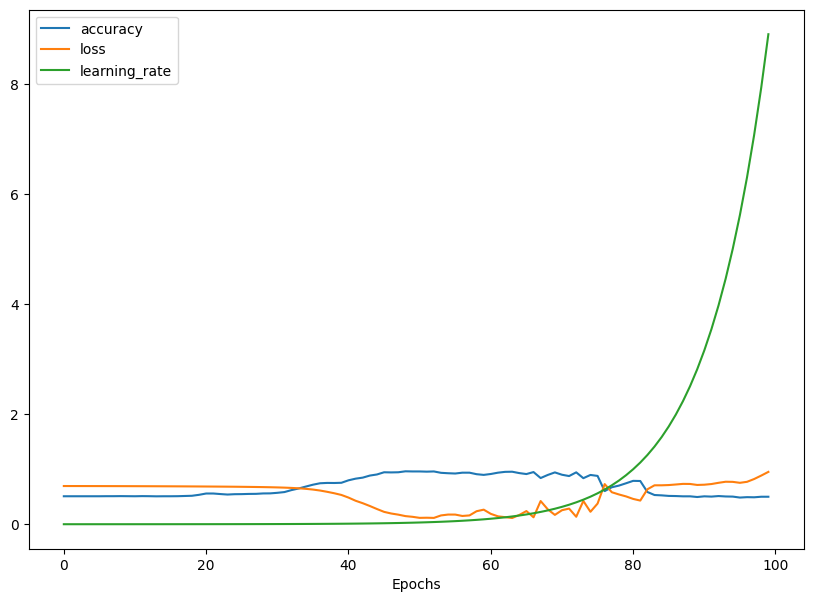

In [ ]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10,7), xlabel = "Epochs")
plt.show()

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0, 0.5, 'Loss')

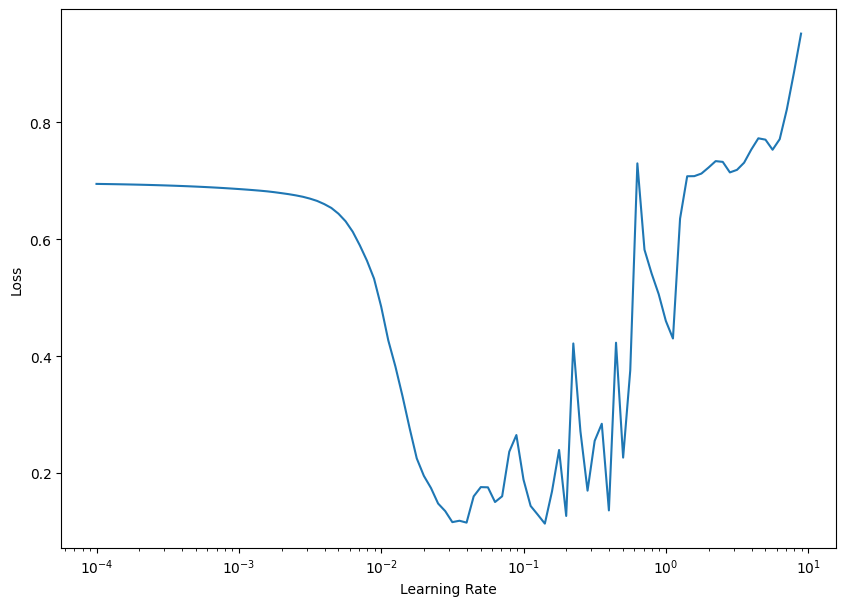

In [ ]:
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
#Example of other typical learning rate values are:
10**0, 10**-1, 10**-2, 10**-3, 10**-4, 10**-5

(1, 0.1, 0.01, 0.001, 0.0001, 1e-05)

**PROTIP:** The ideal learing rate is where the the loss decrease the fastest...in the above case it is just behind the lowest point in the graph

In [ ]:
# Learning rate we used before
10**-2

0.01

In [ ]:
#lets try using a higher *ideal* lr with the same model

#Set random seed
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
    ])

# Compile the model.
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ["accuracy"])

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs = 20, verbose = 0)

In [ ]:
# prompt: I want the accuracy for last epoch

print(history_10.history['accuracy'][-1])


0.7412499785423279


In [ ]:
#Evaluate model 10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6657 - loss: 0.5948


[0.5643331408500671, 0.6949999928474426]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4695 


[0.45855313539505005, 0.7950000166893005]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


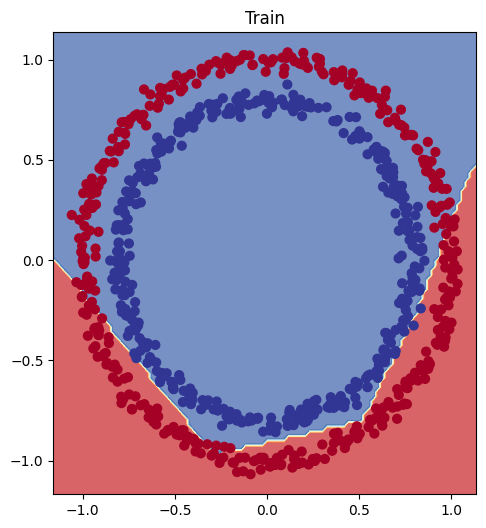

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


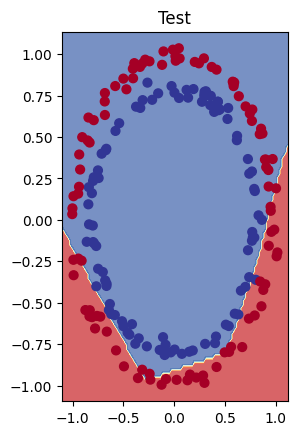

In [ ]:
#Plot the decision boundries for train and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

##Classification evaluation metrics

    tp: true positive

    tn: true negative

    fp: false positive

    fn: false negative


1. Accuracy: (tp + tn / tp + tn + fp + fn) [not best for imbalanced classes]

2. Precision: (tp / tp + fp) [High precision leads to less fp]

3. Recall: (tp / tp + fn) [high recall leads to less false negatives]

4. F1-score: (2 * precision * recall / precision + recall)
  
  [Combination of precision and recall usually good metric for classification prblms]

5. confusion matrix

6. classification report frm ski-kit_learn

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4695 
Model loss on the test set: 0.45855313539505005
Model accuracy on the test set: 79.50%


How about a confusion matrix?

In [ ]:
y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

The `y_pred` is in the continuous **prediction probability** form...which is the standard type of output for sigmoid or the softmax distribution.

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_8.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred)) # tf.round rounds off the values

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[67, 33],
       [ 8, 92]])

 How about we prettify our confusion matrix?

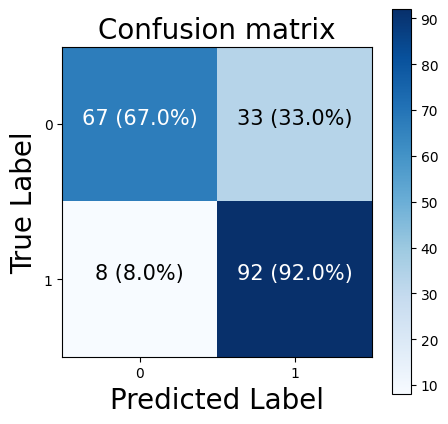

In [ ]:
#Note:the confusion matrix we are gonna write is the remix of scikit-learns plot_confusion matrix function.

import itertools
figsize = (5,5)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

#prettify it
fig, ax = plt.subplots(figsize = figsize)

#Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title = "Confusion matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment = "center",
             color = "white" if cm[i,j] > threshold else "black",
             size = 15)

In [ ]:
#Functionized form of the above code!!
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(5,5), normalize=True, title="Confusion Matrix"):
    """
    Function to plot a confusion matrix using matplotlib.

    Args:
    y_true (array): True labels.
    y_pred (array): Predicted labels.
    classes (list, optional): List of class labels. If None, integer labels are used.
    figsize (tuple, optional): Size of the figure.
    normalize (bool, optional): If True, normalizes the confusion matrix.
    title (str, optional): Title of the confusion matrix plot.

    Returns:
    A confusion matrix plot.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))

    # Normalize the confusion matrix if required
    if normalize:
        cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm_norm = cm

    n_classes = cm.shape[0]

    # Set up the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Define class labels
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Set axis labels and title
    ax.set(title=title,
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Determine threshold for text color
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)" if normalize else f"{cm[i,j]}",
                 horizontalalignment="center",
                 color="white" if cm[i,j] > threshold else "black",
                 size=15)

    # Show the plot
    plt.show()

# Example usage:
# plot_confusion_matrix(y_test, y_pred, classes=["Class 1", "Class 2", "Class 3"])


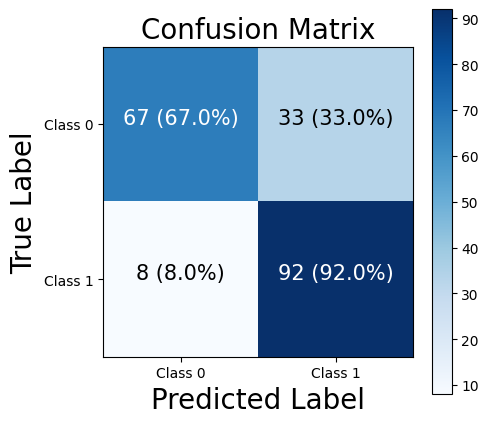

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes = ["Class 0", "Class 1"])

In [ ]:
cm_norm

array([[0.67, 0.33],
       [0.08, 0.92]])

# Working with multiclass classification


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and testing set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#Show the first training example
print(f"Training example labels: \n{train_data[0]}")
print(f"Training example labels: \n{train_labels[0]}")

Training example labels: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0 

In [ ]:
#Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

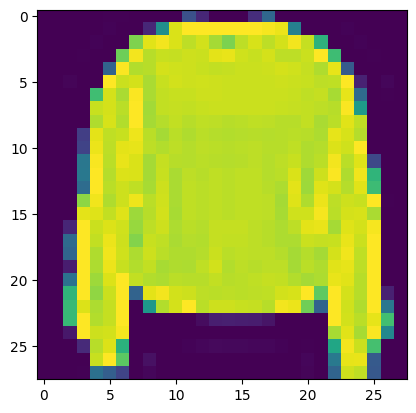

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
# Create a small list to index onto our training labels
class_names = ["T-shirt/ top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/ top')

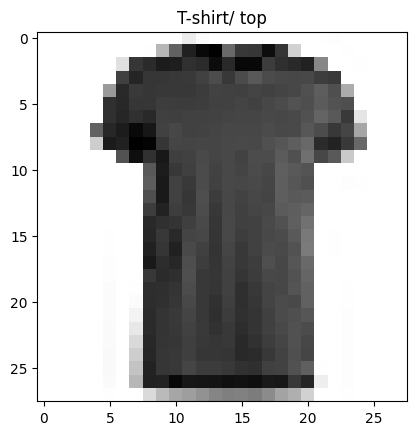

In [ ]:
#plot an example image and its labels
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

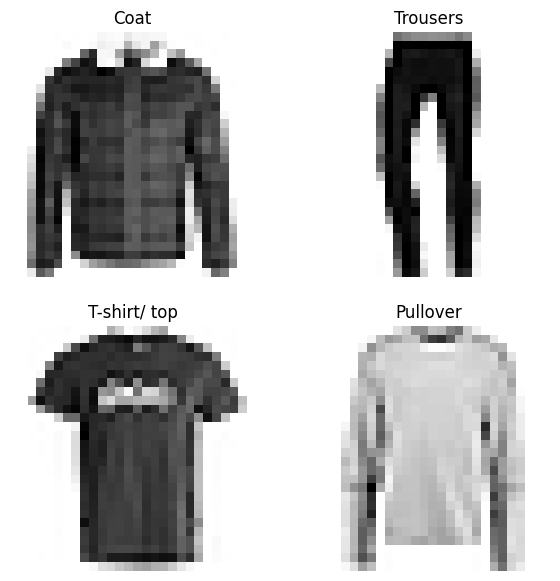

In [ ]:
#plot multiple random images
import random
plt.figure(figsize = (7,7))
for i in range (4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things
* Input shape = (28,28)
* Output shape = 10
* Loss fn = tf.keras.losses.CategoricalCrossEntropy()
  * If your labels are one-hot encoded, use categorical crossentropy
  * If your labels are in form of integers use SparseCategoriacalCrossEntropy
* Output layer activation = Softmax(not sigmoid)

In [ ]:
train_data[0].shape

(28, 28)

IMP!! FLATTEN LAYER INFORMATION

In [ ]:
flattened_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flattened_model.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [ ]:
!pip install tensorflow

import tensorflow as tf

#Set random seed
tf.random.set_seed(42)

#Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Add a Flatten layer to handle the input shape
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Use CategoricalCrossentropy
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels, # Use one-hot encoded labels
                                epochs = 10,
                                validation_data = (test_data, test_labels)) # Use one-hot encoded labels

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0990 - loss: 2.4679 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [ ]:
#check the model summary
model_11.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
#check the min and maxx values of training data
train_data.min(), train_data.max()

(0, 255)

Nerual networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensors between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 & 1 dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#Set random Seed
tf.random.set_seed(42)

#Create a model(same as before)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3933 - loss: 1.5927 - val_accuracy: 0.6270 - val_loss: 0.8950
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6542 - loss: 0.8479 - val_accuracy: 0.7464 - val_loss: 0.7283
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7479 - loss: 0.6980 - val_accuracy: 0.7466 - val_loss: 0.6763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7590 - loss: 0.6428 - val_accuracy: 0.7618 - val_loss: 0.6390
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7682 - loss: 0.6121 - val_accuracy: 0.7714 - val_loss: 0.6160
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7760 - loss: 0.5921 - val_accuracy: 0.7799 - val_loss: 0.6050
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7833 - loss: 0.5785 - val_accuracy: 0.7842 - val_loss: 0.5970
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7881 - loss: 0.5685 

🔑**NOTE**: Neural networks tend to prefer data in numerical form as well as scaled and normalized form

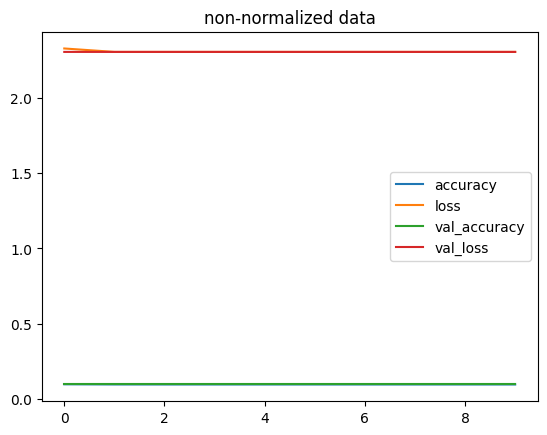

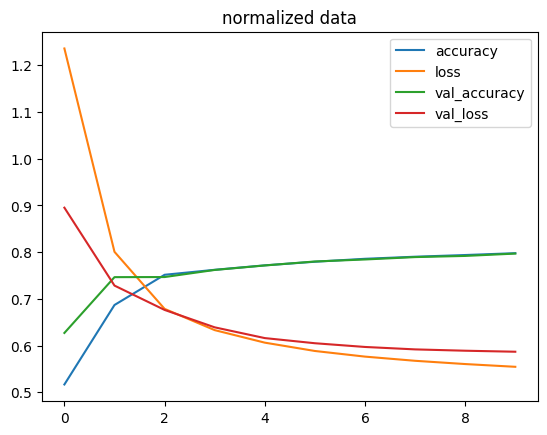

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non-normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")
plt.show()

> 🔑 **NOTE:** The same model with even *slightly* different data can produces dramatically different results, so when comparing models it is imp to compare them on same critera(eg. same architecture but different data or same data but different architecture).

##Finding the Ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1074 - loss: 2.3505 - val_accuracy: 0.2078 - val_loss: 1.8404 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2277 - loss: 1.8177 - val_accuracy: 0.2688 - val_loss: 1.6905 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2635 - loss: 1.6915 - val_accuracy: 0.2731 - val_loss: 1.6556 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2739 - loss: 1.6551 - val_accuracy: 0.2774 - val_loss: 1.6441 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2755 - loss: 1.6271 - val_accuracy: 0.2806 - val_loss: 1.6122 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2755 - loss: 1.6302 - val_accuracy: 0.2833 - val_loss: 1.6191 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2806 - loss: 1.6169

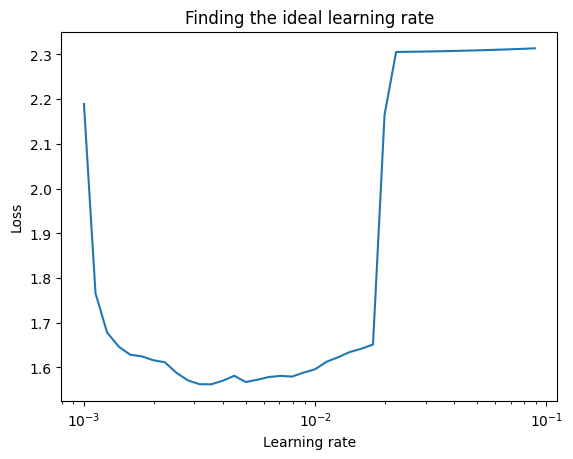

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
#Lets refit the model with the ideal learning rate

#Set random seed
tf.random.set_seed(42)

#Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2507 - loss: 1.8511 - val_accuracy: 0.4264 - val_loss: 1.3906
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4319 - loss: 1.3573 - val_accuracy: 0.4678 - val_loss: 1.2836
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4912 - loss: 1.2483 - val_accuracy: 0.5783 - val_loss: 1.0673
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5835 - loss: 1.0366 - val_accuracy: 0.6350 - val_loss: 0.9787
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6347 - loss: 0.9550 - val_accuracy: 0.6432 - val_loss: 0.9268
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6410 - loss: 0.9102 - val_accuracy: 0.6461 - val_loss: 0.9015
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6450 - loss: 0.8847 - val_accuracy: 0.6468 - val_loss: 0.8853
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6510 - loss: 0.8672 - 

## Evaluating our multiclass classification model

To evaluate our multi-class classification model we could:
* Evaluate it's performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data_norm) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.30974656e-10, 2.04618024e-15, 0.00000000e+00, 1.90268371e-10,
        3.86744363e-41, 3.70269686e-01, 2.72575323e-22, 8.55822563e-02,
        5.19056020e-10, 5.44148028e-01],
       [4.87857498e-03, 1.34037247e-12, 1.62373081e-01, 1.98745387e-04,
        2.48998284e-01, 7.12951532e-07, 1.56260520e-01, 9.05251829e-04,
        4.26384777e-01, 1.07398201e-07],
       [4.34057228e-03, 9.60685194e-01, 5.10125005e-07, 3.27266380e-02,
        5.40738995e-07, 2.19290331e-03, 3.82476101e-05, 1.42580529e-05,
        6.23829237e-08, 1.15915884e-06],
       [4.34057228e-03, 9.60685194e-01, 5.10125005e-07, 3.27266380e-02,
        5.40738995e-07, 2.19290331e-03, 3.82476101e-05, 1.42580529e-05,
        6.23829237e-08, 1.15915884e-06],
       [3.16237628e-01, 8.69187861e-05, 1.12674296e-01, 1.75295308e-01,
        9.62271914e-02, 1.64219772e-03, 2.82880604e-01, 4.86856047e-03,
        1.00741517e-02, 1.31243123e-05]], dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) method.`

**NOTE**: remember to make the prediction on the same dataset as you have taken for training the model....here for example the non-normalized dataset.

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.3097466e-10, 2.0461802e-15, 0.0000000e+00, 1.9026837e-10,
        3.8674436e-41, 3.7026969e-01, 2.7257532e-22, 8.5582256e-02,
        5.1905602e-10, 5.4414803e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
#Convert all prediction probabilities into integers
y_pred = y_probs.argmax(axis = 1)
y_pred[:10]

array([9, 8, 1, 1, 0, 1, 2, 2, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_pred)

array([[324,   7,  30, 560,   2,   2,  66,   1,   8,   0],
       [ 13, 940,   2,  42,   1,   0,   2,   0,   0,   0],
       [ 63,   0, 563,  23,  70,   0, 270,   0,  11,   0],
       [163,  98,  22, 648,   0,   0,  65,   0,   4,   0],
       [ 74,   0, 574,  18, 192,   0, 133,   0,   9,   0],
       [  2,   0,   0,   0,   0, 916,   2,  49,   0,  31],
       [209,   2, 438,  98,  48,   0, 185,   0,  20,   0],
       [  0,   0,   0,   0,   0,  36,   0, 927,   3,  34],
       [ 10,   0,  42,   3,  88,   2,  12,   8, 835,   0],
       [  0,   0,   0,   0,   1,  35,   0,  60,   0, 904]])

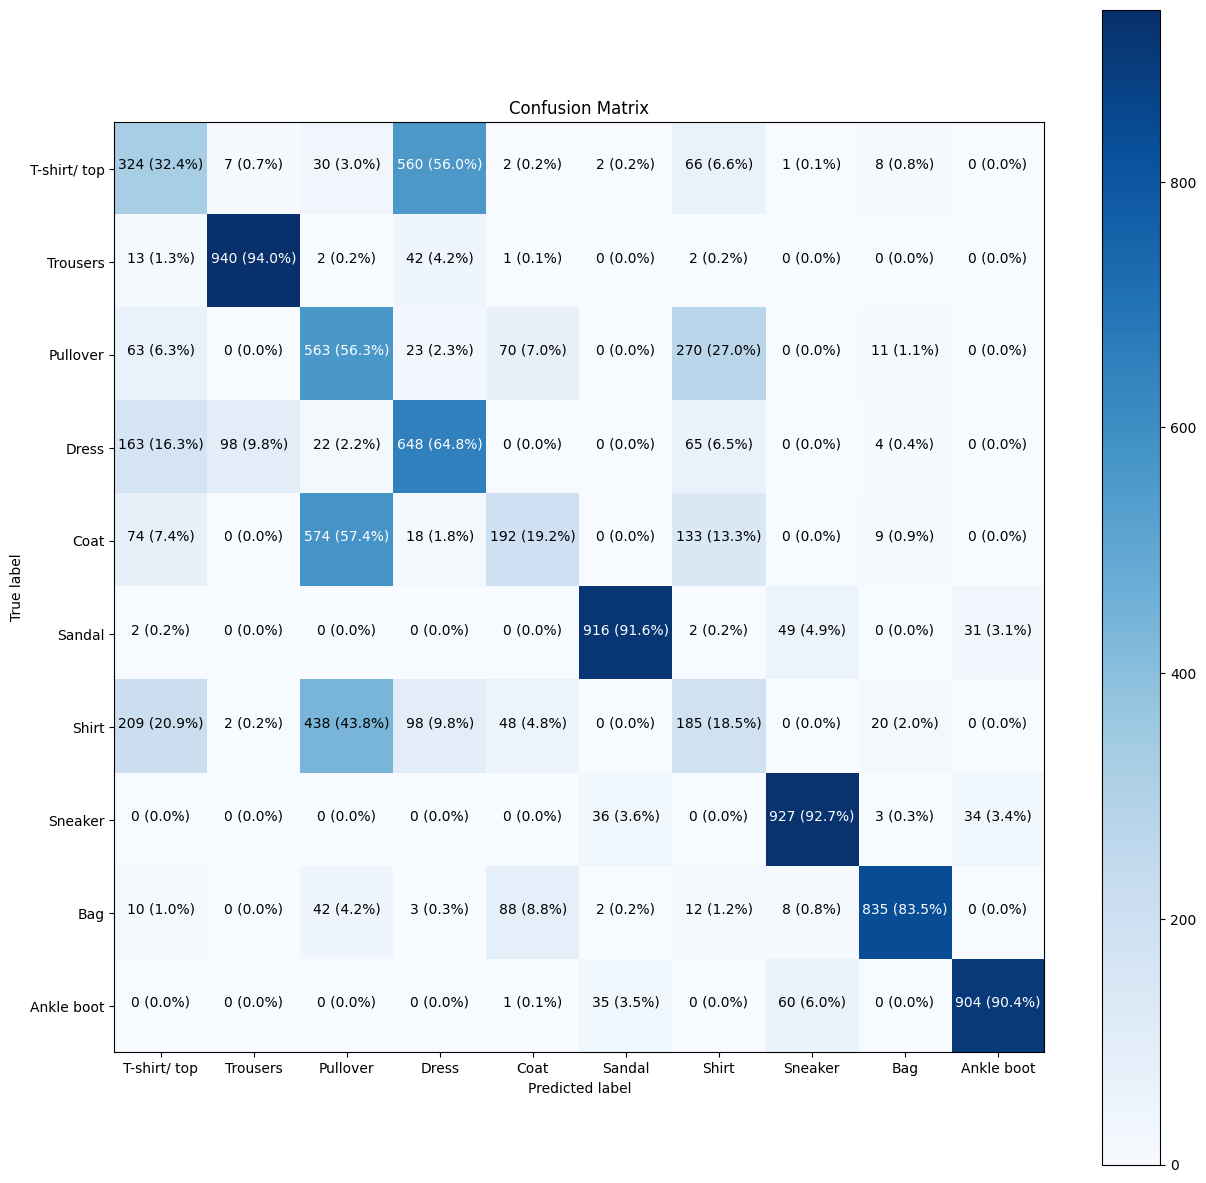

In [ ]:
make_confusion_matrix(y_true = test_labels, y_pred = y_pred, classes = class_names, figsize = (15, 15), text_size = 10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
import random
def plot_random_image(model, image, true_labels, class_names):
  i = random.randint(0, len(image))

  #Create predictions and targets
  target_image = image[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = class_names[pred_probs.argmax()]
  true_label = class_names[true_labels[i]]

  #plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  #Change the color of the tile depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f} % (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color = color)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


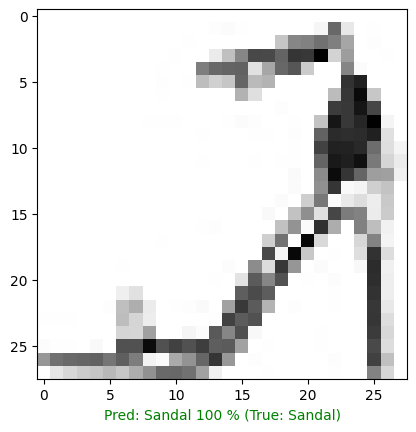

In [ ]:
plot_random_image(model = model_14, image = test_data, true_labels = test_labels, class_names = class_names)

##What patterns is our model learning??

In [ ]:
#Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_8, built=True>,
 <Dense name=dense_49, built=True>,
 <Dense name=dense_50, built=True>,
 <Dense name=dense_51, built=True>]

In [ ]:
model_14.layers[i]

<Dense name=dense_51, built=True>

In [ ]:
#get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

#Shapes
weights.shape, weights

((784, 4),
 array([[-0.04762955,  0.0249671 , -0.02133993, -0.41076252],
        [-0.54042166, -0.04433331,  0.48958284, -0.4146103 ],
        [-0.34015256,  0.04296182,  0.2676754 , -0.6723969 ],
        ...,
        [ 0.07037685, -0.00307437,  0.26146007, -0.00099515],
        [ 0.04934147, -0.03746667,  0.525753  , -0.19210672],
        [-0.8759177 , -0.02986934,  0.44136593, -0.50074553]],
       dtype=float32))

In [ ]:
model_14.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
28*28

784

Now lets check out the bias vector

In [ ]:
#Bias and biases shape
biases, biases.shape

(array([-0.5600161 , -0.02194447,  2.3334212 ,  3.2997465 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

#PRACTICE PROBLEM!

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n_samples = 1000

X, y = make_moons(n_samples, noise = 0.05, random_state = 42)

In [ ]:
X

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
moons = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
moons.head()

,X0,X1,label
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


In [ ]:
moons.label.value_counts()

,count
label,
1,500
0,500


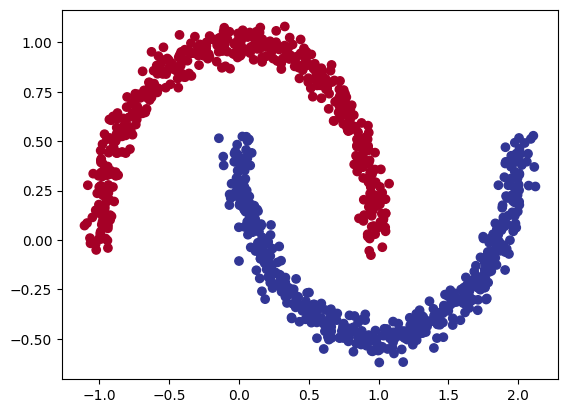

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape


((1000, 2), (1000,))

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation =  "relu"),
    tf.keras.layers.Dense(4, activation =  "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_1.fit(X_train, y_train, epochs = 80, callbacks = [lr_scheduler], validation_data = (X_test, y_test))

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3451 - loss: 0.7644 - val_accuracy: 0.3300 - val_loss: 0.7565 - learning_rate: 1.0000e-04
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3328 - loss: 0.7610 - val_accuracy: 0.3350 - val_loss: 0.7529 - learning_rate: 1.1220e-04
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3328 - loss: 0.7573 - val_accuracy: 0.3350 - val_loss: 0.7491 - learning_rate: 1.2589e-04
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3331 - loss: 0.7533 - val_accuracy: 0.3400 - val_loss: 0.7449 - learning_rate: 1.4125e-04
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3365 - loss: 0.7489 - val_accuracy: 0.3650 - val_loss: 0.7404 - learning_rate: 1.5849e-04
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3413 - loss: 0.7443 - val_accuracy: 0.3800 - val_loss: 0.7356 - learning_rate: 1.7783e-04
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss

In [ ]:
y_pred  = model_1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

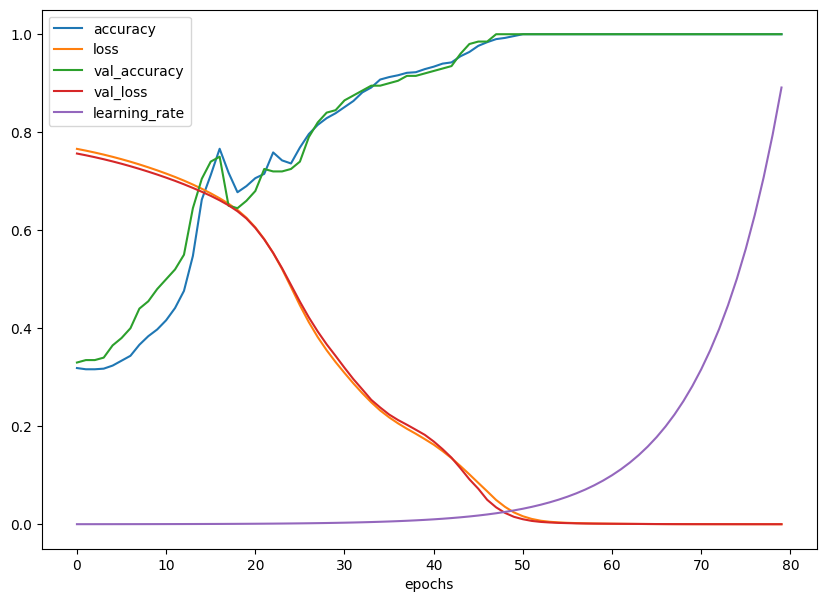

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel = "epochs");

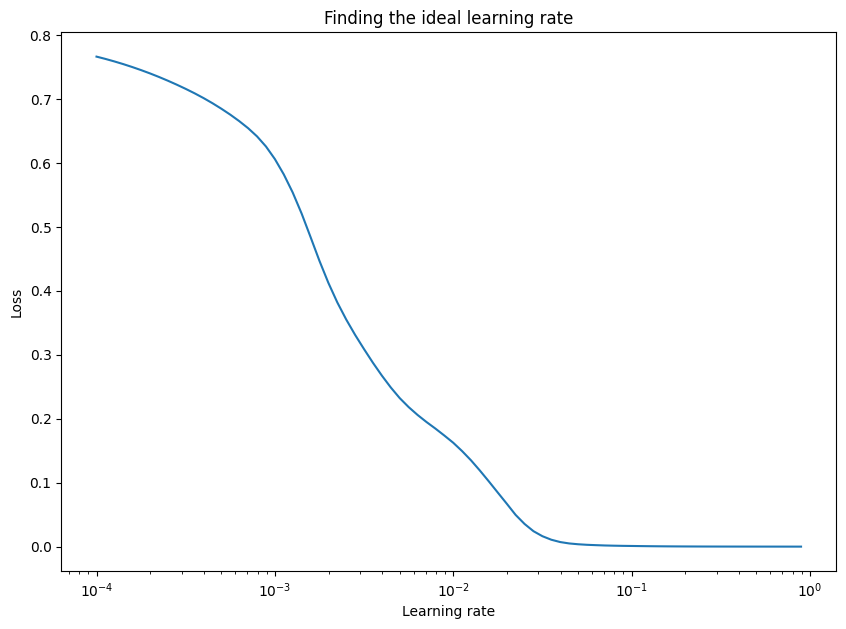

In [ ]:
lrs = 1e-4 * (10**(np.arange(80)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


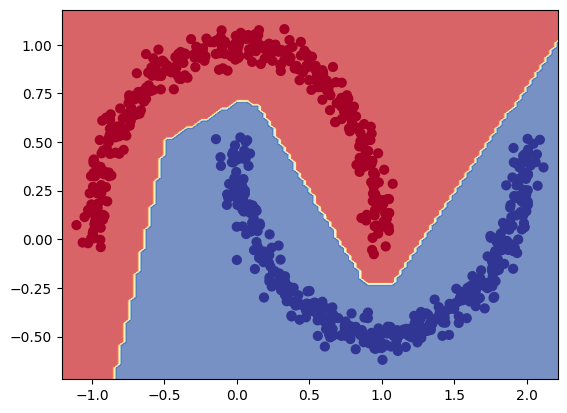

In [ ]:
plot_decision_boundary(model_1, X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


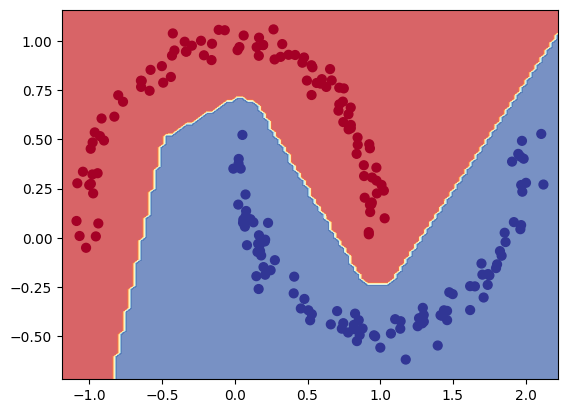

In [ ]:
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

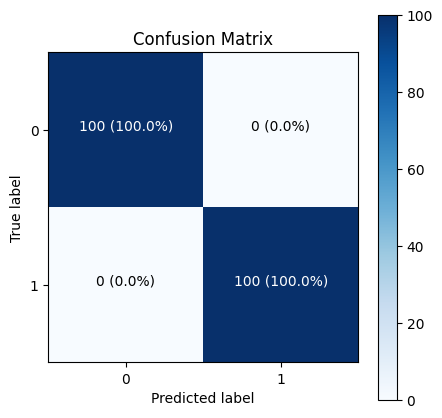

In [ ]:
make_confusion_matrix(y_true = y_test, y_pred = y_pred_binary, classes = ["0", "1"], figsize = (5,5), text_size = 10)

In [ ]:

import tensorflow as tf

def my_softmax(tensor):
  """
  Applies the softmax activation function to a tensor.
  """
  exp_tensor = tf.exp(tensor)
  sum_exp_tensor = tf.reduce_sum(exp_tensor, axis=-1, keepdims=True)
  return exp_tensor / sum_exp_tensor

# Example usage:
my_tensor = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
result = my_softmax(my_tensor)
print(result)


tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.09003057 0.24472846 0.66524094]], shape=(2, 3), dtype=float32)
